### Add scripts to the notebooks path

In [1]:
import os, sys

current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

scripts_path = os.path.join(parent_dir, 'scripts')

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# Insert the path to the Scripts directory
sys.path.insert(0, scripts_path)

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

d:\KifiyaAIM-Course\Week - 11\GMF-Investments-Portfolio-Management\notebooks


### Import Statements

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scripts.modeling import ForecastModel
from scripts.finance_data_processor import FinanceDataProcessor

In [3]:
sns.set_theme()

### Data Loading

In [4]:
processor = FinanceDataProcessor()

bnd_data = processor.read_data(ticker='BND')

Prepare data for modeling

In [5]:
trainer = ForecastModel(data_frame=bnd_data)

trainer.preprocess_data()

d:\KifiyaAIM-Course\Week - 11\GMF-Investments-Portfolio-Management\scripts\modeling.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.training_set[self.column_name] = train_scaled.flatten()
d:\KifiyaAIM-Course\Week - 11\GMF-Investments-Portfolio-Management\scripts\modeling.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.testing_set[self.column_name] = test_scaled.flatten()


### Start modeling

1) ARIMA model

In [6]:
trainer.train_auto_arima()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-16627.283, Time=0.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-16632.159, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-16632.735, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16632.835, Time=1.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-16633.861, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-16632.381, Time=0.92 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.289 seconds


2) Train SARIMA model

In [7]:
trainer.train_seasonal_arima()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=-16626.876, Time=2.54 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=-16632.159, Time=0.43 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=-16633.683, Time=3.07 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=-16633.519, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=-16633.861, Time=0.14 sec
 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=-16632.810, Time=1.05 sec
 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=-16632.558, Time=1.14 sec
 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=-16631.617, Time=2.18 sec
 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=-16632.735, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=-16632.835, Time=0.69 sec
 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=-16632.381, Time=1.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[5]          
Total fit time: 13.949 seconds


3) Train LSTM

Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0988 - val_loss: 0.0027
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - loss: 0.0054 - val_loss: 0.0011
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0052 - val_loss: 0.0033
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0043 - val_loss: 9.6534e-04
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0039 - val_loss: 0.0025
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0042 - val_loss: 0.0012
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0040 - val_loss: 0.0013
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0037 - val_loss: 0.0046


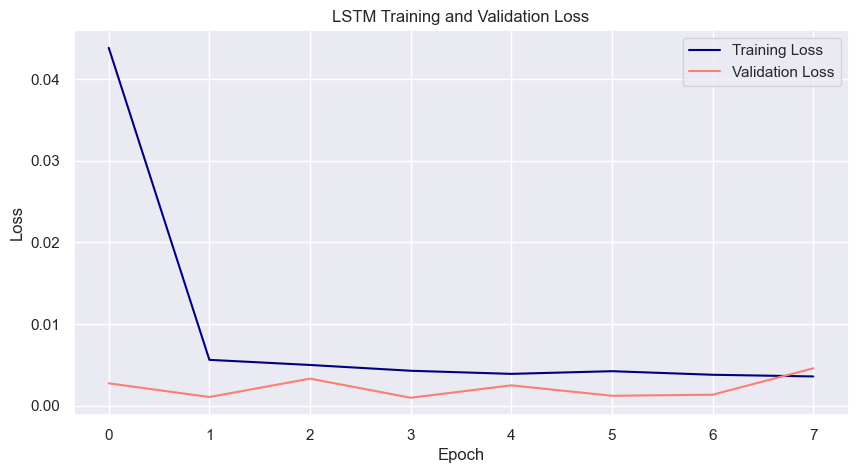

In [8]:
trainer.train_lstm()

### Now make predictions

In [9]:
trainer.make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━

In [10]:
trainer.save_predictions(file_path='../data/predictions.csv')